In [2]:
from __future__ import print_function, division

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Part 1

In [111]:
def gaussian_function(x, a, b, c):
    return a*np.exp(-(x-b)**2 / (2*c**2))

In [112]:
x = np.linspace(-5, 5,100)
def gaussian(x, a, b, c):
    return a*np.exp(-(x-b)**2 / 2*c**2)

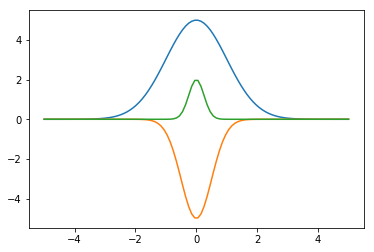

In [113]:
plt.plot(x, gaussian(x, 5,0,1))
plt.plot(x, gaussian(x, -5, 0, 2))
plt.plot(x, gaussian(x, 2, 0, 4))

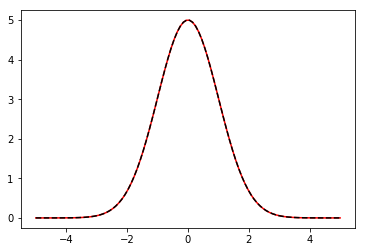

In [114]:
unfitted_data = plt.plot(x, gaussian(x, 5,0,1), color='red')
y = gaussian(x, 5, 0, 1)
best_vals, covar = curve_fit(gaussian, x, y, p0=[1, 0, 1])
plt.plot(x,gaussian(x,*best_vals),'k--')



In [115]:
data = np.loadtxt("HDalpha_data",unpack=True)

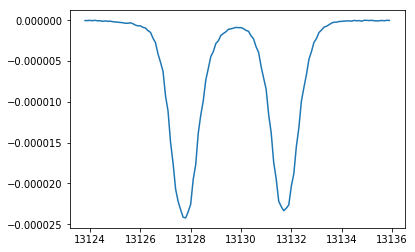

In [121]:
x_data = data[0]
y_data = data[1]
plt.plot(x_data,y_data)

Text(0.5,1,u'Emission Signal and Double Gaussian Fit for Hydrogen/Deuterium')

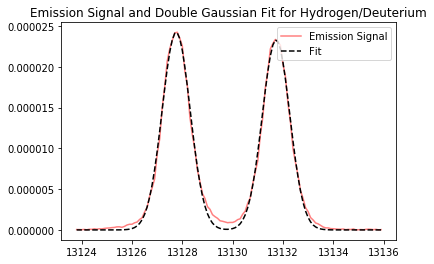

In [128]:
y_data = -(y_data)
unfitted_data = plt.plot(x_data, y_data, color='red',label='Emission Signal',alpha=0.8)
def double_gaussian(x, a1, b1, c1, a2, b2, c2):
    return a1*np.exp(-(x-b1)**2 / (2*c1**2)) + a2*np.exp(-(x-b2)**2 / 2*c2**2)
best_vals, covar = curve_fit(double_gaussian, x_data, y_data, p0=[.000025, 13128, .1, .000025, 13132, .1])
plt.plot(x_data,double_gaussian(x_data,*best_vals), 'k--', label='Fit')
plt.legend(loc = 'upper right')
plt.title('Emission Signal and Double Gaussian Fit for Hydrogen/Deuterium')

# Part 2

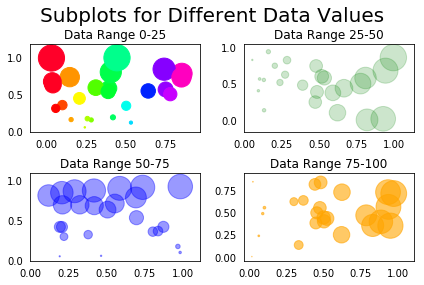

In [134]:
x_data = np.random.uniform(low = 0, high = 1, size=(100,))
y_data = np.random.uniform(low = 0, high = 1, size=(100,))
f, ((ax0, ax1),(ax2, ax3)) = plt.subplots(2,2)

area_1 = np.pi* (15*y_data[0:25])**2
area_2 = np.pi* (15*x_data[25:50])**2
area_3 = np.pi* (15*y_data[50:75])**2
area_4 = np.pi* (15*x_data[75:100])**2
colors1 = x_data[0:25]

ax0.set_title('Data Range 0-25')
ax0.scatter(x_data[0:25],y_data[0:25], c=colors1,cmap=plt.cm.gist_rainbow, alpha = 1, s = area_1)
ax0.tick_params(bottom='off', left='off')

ax1.set_title('Data Range 25-50')
ax1.scatter(x_data[25:50],y_data[25:50], color = 'green', alpha = 0.2, s = area_2)
ax1.tick_params(bottom='off', left = 'off')

ax2.set_title('Data Range 50-75')
ax2.scatter(x_data[50:75], y_data[50:75], color = 'blue', alpha = 0.4, s = area_3)
ax2.tick_params(bottom='off', left = 'off')

ax3.set_title('Data Range 75-100')
ax3.scatter(x_data[75:100], y_data[75:100], color = 'orange', alpha = 0.6, s = area_4)
ax3.tick_params(bottom='off', left = 'off')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.suptitle('Subplots for Different Data Values', fontsize=20)

plt.savefig('different_plots.pdf')

# Part 3

In [150]:
def flux_for_dipole(x_pos, y_pos, Q_vals, X, Y):
    """
    Returns the flux based on the information of the charges
    and the grid of the plot.
    Code modified from Physics 113, written by Blas Cabrera
    """
    flux = np.zeros((len(X), len(Y)))
    x_m = np.outer(np.ones((X.size)), X); 
    y_m = np.outer(Y, np.ones((Y.size))); 
    for n in range(len(Q_vals)):
        flux += 2*np.pi*Q_vals[n]*(1 - (x_pos[n]-x_m)/np.sqrt((y_pos[n]-y_m)**2+(x_pos[n]-x_m)**2))
    return flux

Text(0,0.5,u'Y Position')

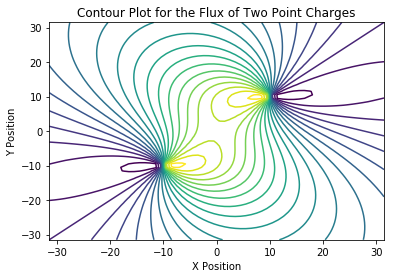

In [165]:
x_pos = [-10,10]
y_pos = [-10,10]
charge = [1,-1]

X = np.linspace(start = -31.5, stop = 31.5, num = 64)
Y = np.linspace(start = -31.5, stop = 31.5, num = 64)

flux = flux_for_dipole(x_pos,y_pos,charge,X,Y)
plt.contour(X, Y, flux, 20)
plt.title('Contour Plot for the Flux of Two Point Charges')
plt.xlabel('X Position')
plt.ylabel('Y Position')